# Solid Earth tides at California, USA at 25 December 2020

In [1]:
%matplotlib inline
import os
import datetime as dt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature
from matplotlib import pyplot as plt, ticker, dates as mdates
from mintpy.utils import plot as pp
import pysolid
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Downloads')
os.chdir(work_dir)
print('Go to directory', work_dir)

Go to directory /Users/yunjunz/Downloads


## Calculate

In [2]:
## inputs
date_str = '20201225'
atr = {
    'LENGTH' : 500,                # number of rows
    'WIDTH'  : 450,                # number of columns
    'X_FIRST': -126,               # min longitude in degree (upper left corner of the upper left pixel)
    'Y_FIRST': 43,                 # max laitude   in degree (upper left corner of the upper left pixel)
    'X_STEP' :  0.000925926 * 30,  # output resolution in degree
    'Y_STEP' : -0.000925926 * 30,  # output resolution in degree
    'CENTER_LINE_UTC': 50864.0,    # UTC time of interest in seconds, e.g. acquisition time at the middle of SAR image
}

## call
(tide_e,
 tide_n,
 tide_u) = pysolid.calc_solid_earth_tides_grid(date_str, atr,
                                               display=False,
                                               verbose=True)

## project ENU to radar line-of-sight (LOS) with positive for motion towards satellite
inc_angle  =   34.0 / 180. * np.pi  # radian, typical value for Sentinel-1
head_angle = -168.0 / 180. * np.pi  # radian, typical value for Sentinel-1 desc track
tide_los = (  tide_e * np.sin(inc_angle) * np.cos(head_angle) * -1
            + tide_n * np.sin(inc_angle) * np.sin(head_angle)
            + tide_u * np.cos(inc_angle))

PYSOLID: ----------------------------------------
PYSOLID: datetime: 2020-12-25T14:07:44
PYSOLID: SNWE: (29.11111, 43.0, -126.0, -113.499999)
SOLID  : calculate solid Earth tides in east/north/up direction
SOLID  : shape: (500, 450), step size: -0.0278 by 0.0278 deg
SOLID  : calculating / writing data to txt file: /Users/yunjunz/Downloads/solid.txt
PYSOLID: read data from text file: /Users/yunjunz/Downloads/solid.txt


## Plot

plot lat/lon label in step of 10 and location of [1, 0, 0, 1]
plot lat/lon label in step of 10 and location of [0, 0, 0, 1]
plot lat/lon label in step of 10 and location of [0, 0, 0, 1]
plot lat/lon label in step of 10 and location of [0, 0, 0, 1]
save figure to file: SET_grid.png


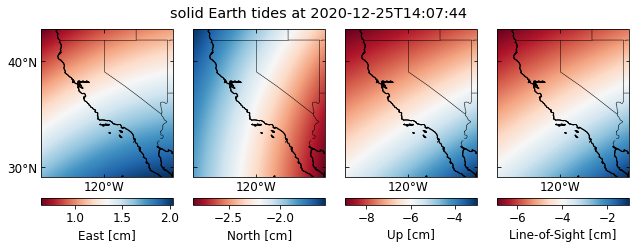

In [3]:
# plot
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=[9, 5], sharex=True, sharey=True, subplot_kw=dict(projection=ccrs.PlateCarree()))

N = float(atr['Y_FIRST'])
W = float(atr['X_FIRST'])
S = N + float(atr['Y_STEP']) * int(atr['LENGTH'])
E = W + float(atr['X_STEP']) * int(atr['WIDTH'])
kwargs = dict(cmap='RdBu',
              origin='upper',
              extent=(W,E,S,N),
              interpolation='nearest')

tides = [tide_e, tide_n, tide_u, tide_los]
labels = ['East [cm]', 'North [cm]', 'Up [cm]', 'Line-of-Sight [cm]']
lalo_locs = [[1,0,0,1],
             [0,0,0,1],
             [0,0,0,1],
             [0,0,0,1]]  # left, right, top, bottom
for i in range(len(tides)):
    ax = axs[i]
    im = ax.imshow(tides[i]*100, **kwargs)

    # axis format
    ax.tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True)
    ax.coastlines(resolution='10m')

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(states_provinces, edgecolor='k', linewidth=0.5)

    pp.draw_lalo_label(geo_box=(W,N,E,S), ax=ax, projection=ccrs.PlateCarree(), lalo_loc=lalo_locs[i], lalo_step=10)
    fig.colorbar(im, ax=ax, orientation='horizontal', label=labels[i], pad=0.07, ticks=ticker.MaxNLocator(3))
t = dt.datetime.strptime(date_str, '%Y%m%d') + dt.timedelta(seconds=float(atr['CENTER_LINE_UTC']))
fig.suptitle('solid Earth tides at {}'.format(t.isoformat()), y=0.7)
fig.tight_layout()

# output
out_fig = 'SET_grid.png'
print('save figure to file:', out_fig)
#fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()